## Acquire Data

In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
# Only keep the top 10,000 most frequently occurring words. 
# Rare words will be discarded. <--- Manageable size.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
def translate_to_English(review):
    # words and integers are one-to-one mapped.
    reverse_word_index = dict([(v,k) for (k,v) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in review])
    return decoded_review

review = translate_to_English(train_data[0])

## Prepare the data
Encoding the integer sequences into a binary matrix.\
Use one-hot encoding -- each review is translated to a vector of 0s and 1s. \
[0 1 0 0 1]\
[a b c d e]\
\'b e\'  

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    re = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):     # loop over each of 25,000 reviews.
        # Since sequence is a vector of integers, it can be used as index.
        # Words contained in the review are set to 1.
        re[i, sequence] = 1.
    return re.astype('float32')

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 10000)
(25000, 10000)
(25000,)
(25000,)


## Build network
The intermediate layers will use relu as their activation function, and \
the final layer will use a sigmoid activation so as to output a probability between 0 and 1.

In [7]:
from keras import models
from keras import layers

model = models.Sequential()

"""
# layers with: 10000[=input], 16, 16, 1[=output]
# The input layer is bundled with the first hidden layer -- Must specify input-dimension for the first hidden layer. 
# The subsequent layers can deduce input shapes.
# 16 hidden units means the weight matrix W will have shape (input_dimension, 16)
"""

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Train the model
Specify the optimizer and loss function.\
Create a validation set by setting appart 10,000 samples from the orginal training data.

In [8]:
x_validation = x_train[:10000]
x_training = x_train[10000:]
y_validation = y_train[:10000]
y_training = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_training, y_training, epochs=20, batch_size=512, 
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 6.6447e-04 - accuracy: 1.0000 - val_loss: 0.9230 - val_accuracy: 0.8620
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 5.4510e-04 - accuracy: 1.0000 - val_loss: 0.9626 - val_accuracy: 0.8627
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 1.0161 - val_accuracy: 0.8624
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 2.9122e-04 - accuracy: 1.0000 - val_loss: 1.0292 - val_accuracy: 0.8625
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 2.5386e-04 - accuracy: 1.0000 - val_loss: 1.0492 - val_accuracy: 0.8621
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 2.0719e-04 - accuracy: 1.0000 - val_loss: 1.0891 - val_accuracy: 0.8587
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.1504 - val_accuracy: 

In [30]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']               # training loss
val_loss_values = history_dict['val_loss']       # validation loss
acc_values = history_dict['accuracy']            # training accuracy 
val_acc_values = history_dict['val_accuracy']    # validation accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


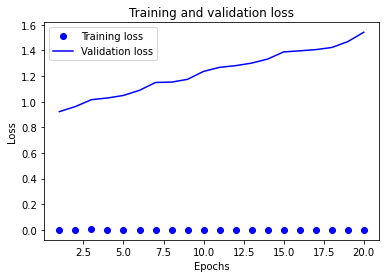

In [31]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc_values) +1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

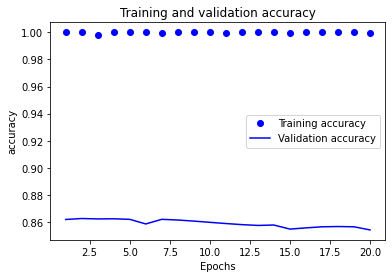

In [33]:
plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

## Overfitting

Validation accuracy dips slightly over epochs. This is a sign of overfitting.\
For the first five epochs the validation accuracy is essentially flat while training accuracy is also flat.\
So the training can stop after 1st epoch, to prevent overfitting.

In [35]:
# evaludate() returns [loss, accuracy]
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 1.6994 - accuracy: 0.8384


[1.6993767023086548, 0.8384000062942505]

## Use a trained network to predict
Use a trained network to generate predictions on new data

In [ ]:
prediction = model.predict(x_test)
print(prediction.shape)